In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
import os
import pandas as pd
import anndata as ad
import seaborn as sns
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariateConditional,EstimatorSettings

In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code/WT_KO_thymus'

In [4]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_KO_3008_genes.h5ad")

In [5]:
"Plin1" in adata.var_names

False

# UMAPs

## Cell types

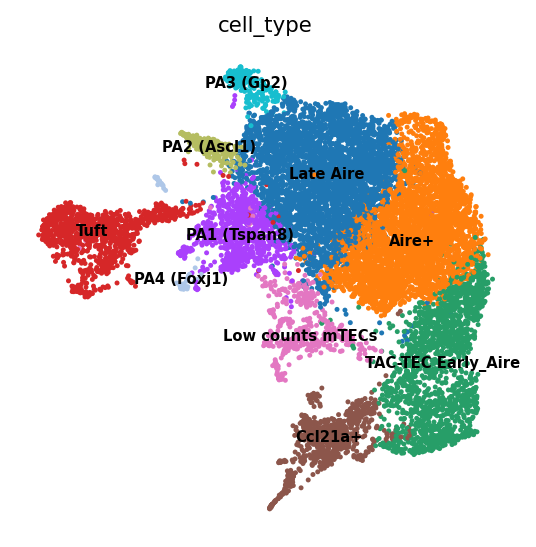

In [14]:
sc.pl.umap(
    adata,
    color="cell_type",
    s=20,
    legend_loc="on data",
    legend_fontsize="x-small",
)

## Genotypes

In [17]:
adata.obs.genotype.value_counts()

KO    6331
WT    6296
Name: genotype, dtype: int64

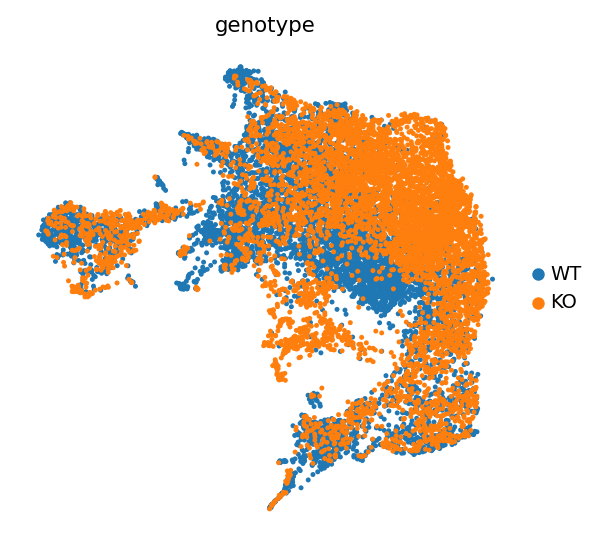

In [15]:
adata.obs.genotype.cat.reorder_categories(["WT", "KO"], inplace=True)
sc.pl.umap(
    adata,
    color="genotype",
    s=20,
)

## Feature plots (KO only)

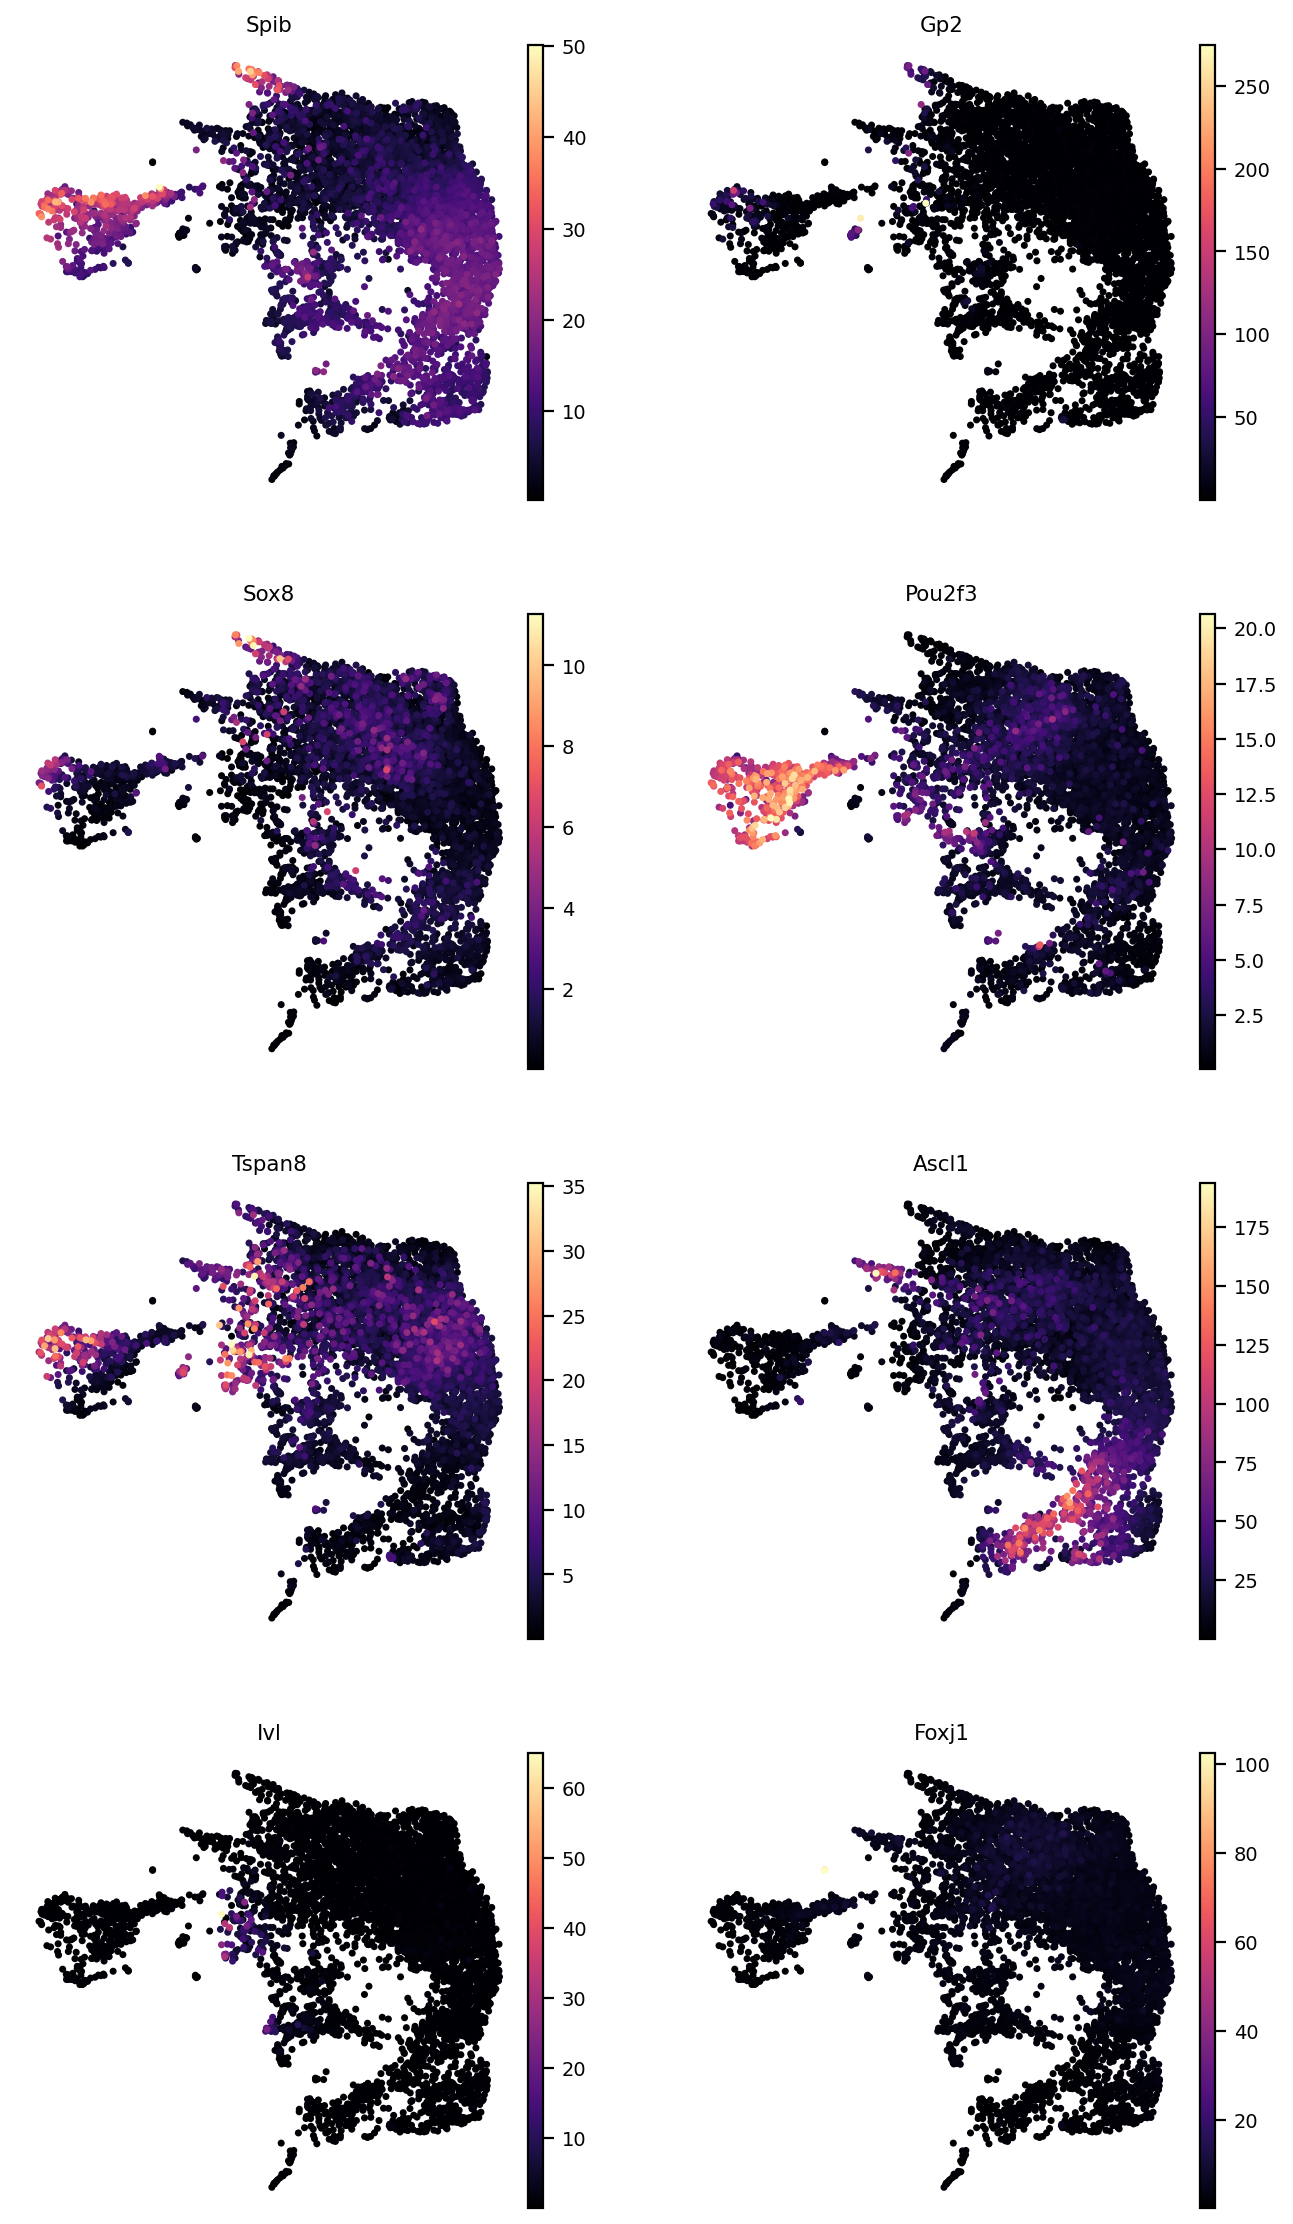

In [25]:
sc.pl.umap(
    adata[adata.obs.genotype == "KO"],
    color=["Spib", "Gp2", "Sox8", "Pou2f3", "Tspan8", "Ascl1", "Ivl", "Foxj1"],
    s=40,
    cmap="magma",
    layer="scVI_normalized",
    ncols=2,
)